## Loss Curves

- Loss curves, on the other hand, depict how the loss function (e.g., mean squared error, cross-entropy) changes over epochs or iterations during the training process.
- The x-axis represents the number of training epochs or iterations, while the y-axis represents the value of the loss function.
- Loss curves are essential for monitoring the convergence of the training process. A decreasing loss indicates that the model is learning and improving its performance on the training data. Conversely, if the loss stagnates or starts increasing, it might indicate that the model has converged or even started overfitting.
- Loss curves are particularly important for optimizing model parameters through techniques like gradient descent. They help in determining when to stop training to prevent overfitting or excessive computational costs.

The example below is taken from [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py).


learning on dataset iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.504185
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.503452
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling 

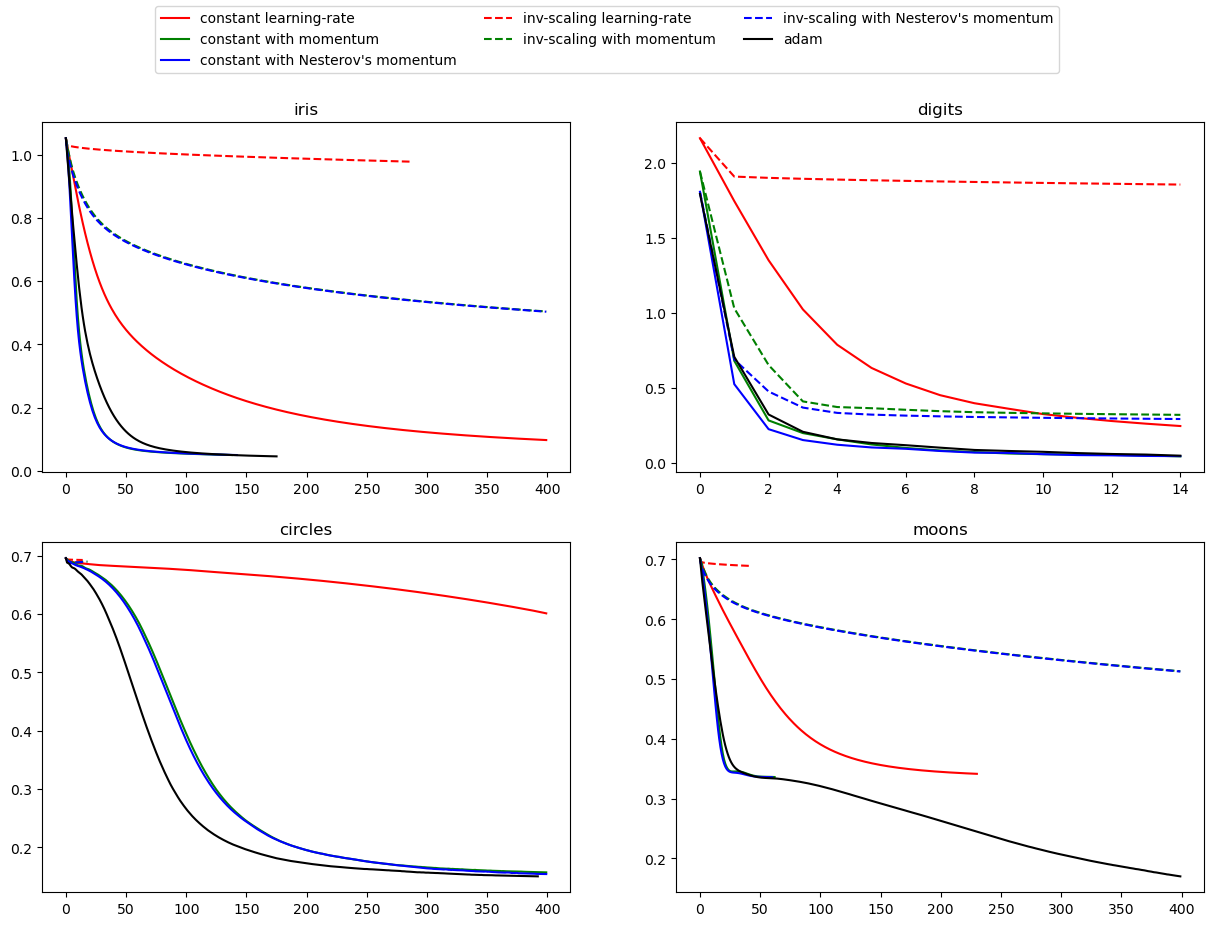

In [1]:
import warnings

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data_sets = [
    (iris.data, iris.target),
    (X_digits, y_digits),
    datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
    datasets.make_moons(noise=0.3, random_state=0),
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["iris", "digits", "circles", "moons"]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

## Validation curves

Validation curves are another important tool in machine learning for evaluating model performance. While learning curves and loss curves primarily focus on the training data, validation curves provide insights into how a model generalizes to unseen data by plotting a performance metric against different values of a hyperparameter.

The example below is taken from [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py).

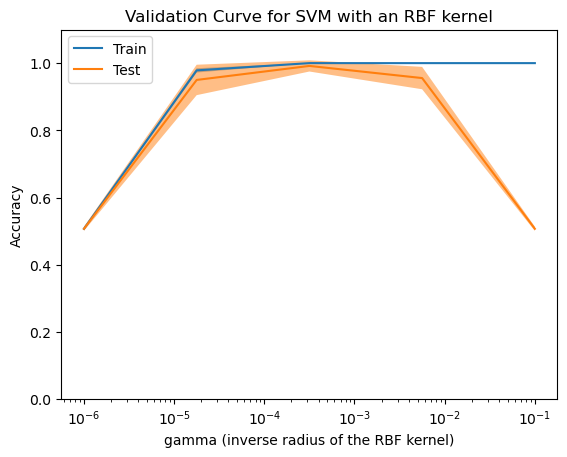

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC

X, y = load_digits(return_X_y=True)
subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
X, y = X[subset_mask], y[subset_mask]

disp = ValidationCurveDisplay.from_estimator(
    SVC(),
    X,
    y,
    param_name="gamma",
    param_range=np.logspace(-6, -1, 5),
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)
disp.ax_.set_title("Validation Curve for SVM with an RBF kernel")
disp.ax_.set_xlabel(r"gamma (inverse radius of the RBF kernel)")
disp.ax_.set_ylim(0.0, 1.1)
plt.show()

## Learning Curves

- Learning curves typically refer to plots that show how the performance of a machine learning model (e.g., accuracy or error rate) changes as a function of training data size.
- The x-axis usually represents the amount of training data, while the y-axis represents the performance metric (e.g., accuracy or error).
- Learning curves are useful for diagnosing issues related to underfitting or overfitting. If the learning curve shows increasing performance with more data, it suggests that the model could benefit from additional training data. Conversely, if the performance plateaus or decreases with more data, it indicates potential issues like overfitting.
- Learning curves are also valuable for comparing the performance of different models or algorithms.

In the demo code below, the [Real Estate Valuation](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set) dataset is used.

In [3]:
# pip install openpyxl

Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

data = pd.read_excel("../data/real_estate_valuation.xlsx")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# rename the columns
renamed_columns = [col.split()[0] for col in data.columns]
renamed_columns_map = {data.columns[i]:renamed_columns[i] for i in range(len(data.columns))}

data.rename(renamed_columns_map, axis=1, inplace=True)

# remove No column
data.drop("No", axis=1, inplace=True)

print(data.head())

# separate features and target data
features, target = data.columns[:-1], data.columns[-1]

X = data[features]
y = data[target]


            X1    X2         X3  X4        X5         X6     Y
0  2012.916667  32.0   84.87882  10  24.98298  121.54024  37.9
1  2012.916667  19.5  306.59470   9  24.98034  121.53951  42.2
2  2013.583333  13.3  561.98450   5  24.98746  121.54391  47.3
3  2013.500000  13.3  561.98450   5  24.98746  121.54391  54.8
4  2012.833333   5.0  390.56840   5  24.97937  121.54245  43.1


# Model that suffers from overfitting 

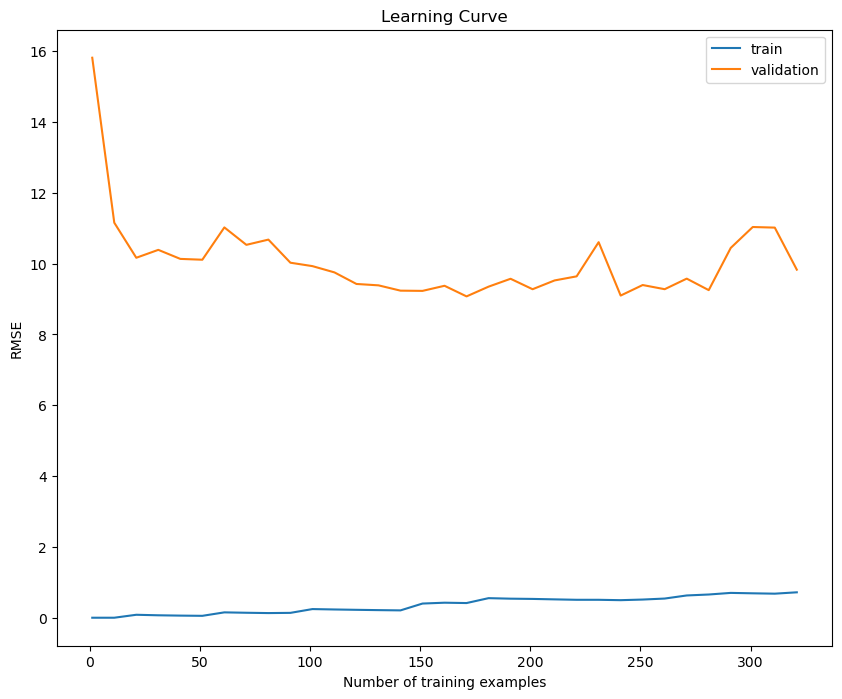

In [16]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# overfitting
decision_tree = DecisionTreeRegressor()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=decision_tree,
    X=X,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = range(1, 330, 10)
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Number of training examples")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

# Model that suffers from underfitting

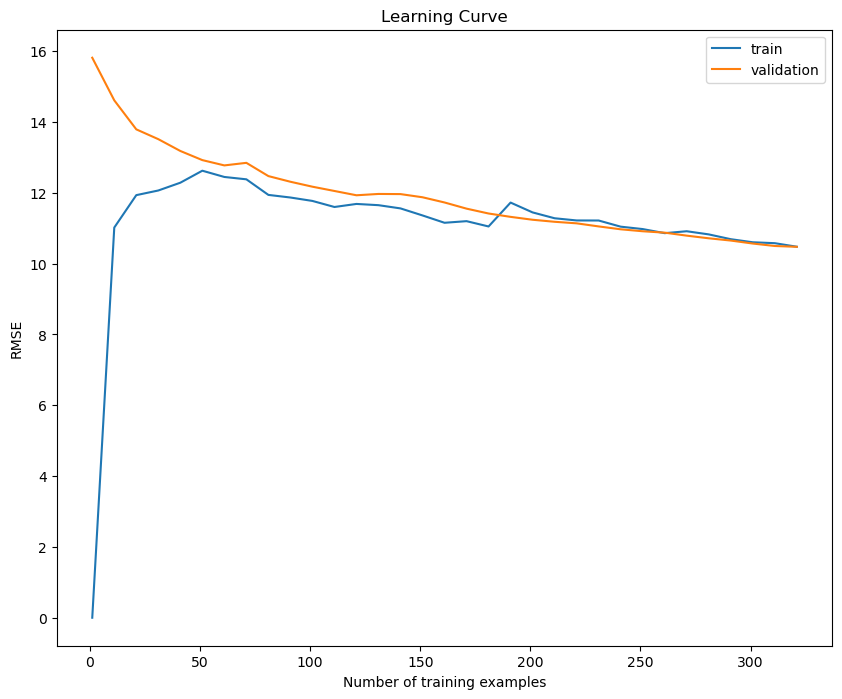

In [17]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Underfitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm = SVR(C=0.25)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=svm,
    X=X_scaled,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = range(1, 330, 10)
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Number of training examples")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()


# Model with the right fit

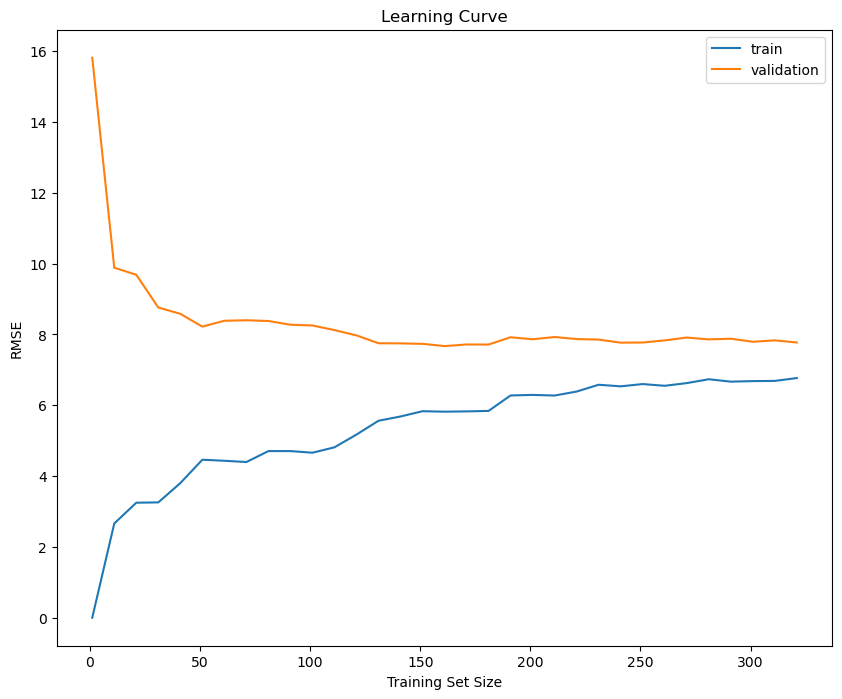

In [13]:
from sklearn.ensemble import RandomForestRegressor

# better
random_forest = RandomForestRegressor(max_depth=3)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=random_forest,
    X=X,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = range(1, 330, 10)
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Number of training examples")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()


# Unrepresentative Validation Dataset

# References

1. [Learning Curves Tutorial: What Are Learning Curves?](https://www.datacamp.com/tutorial/tutorial-learning-curves)
2. [Using Learning Curves to Analyse Machine Learning Model Performance](https://skyengine.ai/se/skyengine-blog/131-using-learning-curves-to-analyse-machine-learning-model-performance)
3. [The Shape of Learning Curves: a Review](https://arxiv.org/pdf/2103.10948.pdf)
4. [154 - Understanding the training and validation loss curves](https://youtu.be/p3CcfIjycBA)
5. [A Critical Skill People Learn Too LATE: Learning Curves In Machine Learning](https://youtu.be/nt5DwCuYY5c)
6. [Cornell CS 5787: Applied Machine Learning. Lecture 22. Part 1: Learning Curves](https://www.youtube.com/watch?v=lYAV5KNk_TY&pp=ygUbbGVhcm5pbmcgY3VydmVzIGRpYWdub3N0aWNz)
7. [Cornell CS 5787: Applied Machine Learning. Lecture 22. Part 2: Loss Curves](https://youtu.be/StNrJnL8eX0?list=PL2UML_KCiC0UlY7iCQDSiGDMovaupqc83)
8. [Cornell CS 5787: Applied Machine Learning. Lecture 22. Part 3: Validation Curves](https://youtu.be/wCBuc6Qc_wI?list=PL2UML_KCiC0UlY7iCQDSiGDMovaupqc83)
9. [Difference between learning_curve and validation_curve](https://datascience.stackexchange.com/questions/62303/difference-between-learning-curve-and-validation-curve)
